# Lesson1 - Key Concepts

- Dataset SalePrice --> np.log --> Because of unequal distribution --> Histogram can tell us more bins analysis
- Date Transformation --> multiple Columns
- Missing Requirements?
    - Strings to Categorise
    - Seprate Categorical_na for Missing Values
    - Numericalize Values
        - if continuous --> Replace Missing with Median
- Overfitting can handle with Correct Validation Set

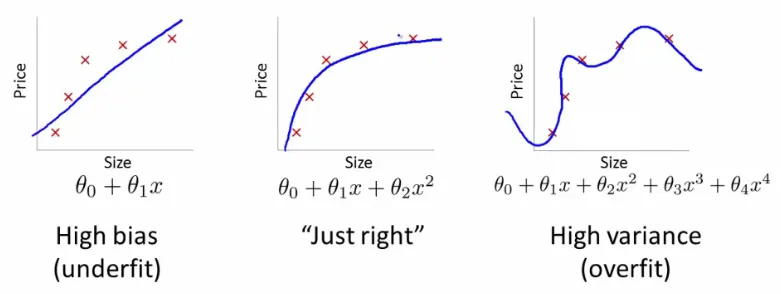
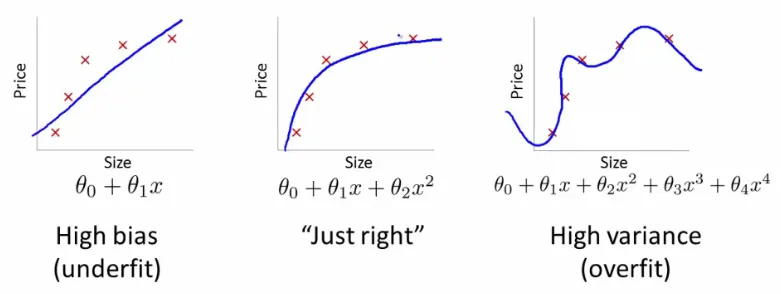

# Lesson 2
- Requirements According to Blubookbuldozers RMSE Log error


  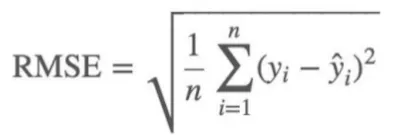

- Towards

  
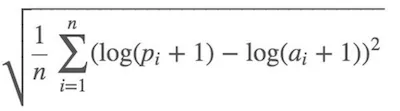


- R^2 components = 1 - (tp divide tmp) 
    - How far are we from the mean?
        - Sum (actual target - mean of prediction) - tmp
    - How far are we from the prediction?
        - Sum (actual target - prediction) - tp
    - what does **tp divided by tmp** say?
        - if prediction is closest to mean?
            - tp divided by tmp is 1
                - R^2 = 0
        - if prediction is closest target?
            - tp divided by tmp is 1
                - R^2 = 1
- R² is the ratio between how good your model is (RMSE) vs how good is the naïve mean model (RMSE).

- If Dataset has a time piece: instead of Cross Validation Time based split based on indexs of row we can do that Training set Past Time - Validation Set Future Time

-  Test vs Valid Data: valid is used to train hyperparameters.
-  Two ways Categorical Columns Converstion:
    -  Numbers
    -  One hot encoding
-  Initial Result R^2 train: 0.982 vs valid: 0.887 states overfitting but RMSE 0.25 takes us on top
  
-  Validation dataset future time why not random rows picking? Because we want to make it resemble with Test set.

-  Overfitting Issues : Kaggle has another private laderboard which is not exposed to public. To avoid bad results use good hyperparameter settings

-  **Methods: Execution Time** %time to check model time should be less than 10 seconds to run analysis allow us to do hyperparameters
    - **Sampling** with different validation set : randomly subset sampling
    - **Estimators** : Less
    - **Max-Depth = 3** : make split to 3
    - **Bootstrap=False** : avoid randomly initialising parameters

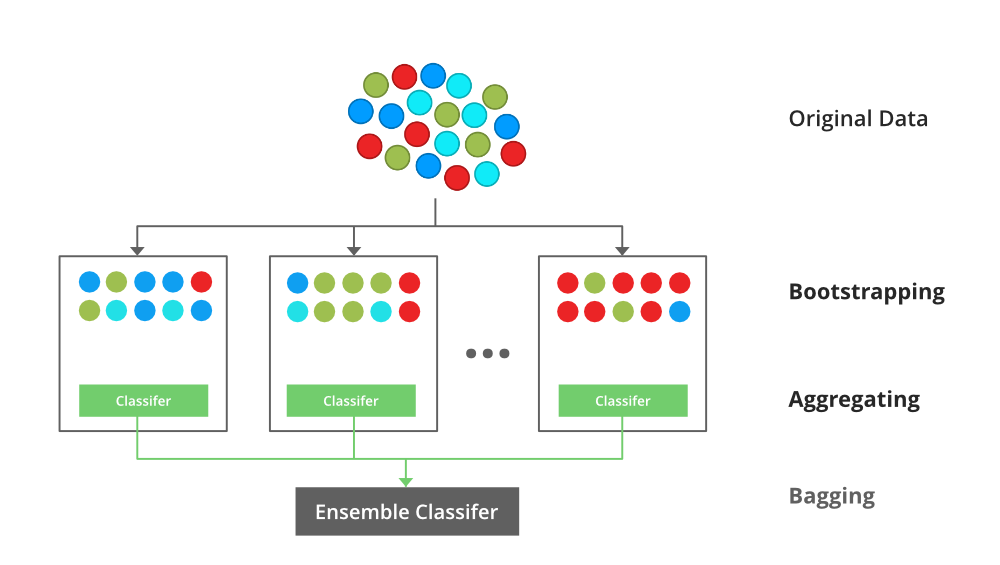


- **idea** : splitting analysis of single column gives you a function in each tree.
  
- R^2 of 0.4028 means it is better than mean model

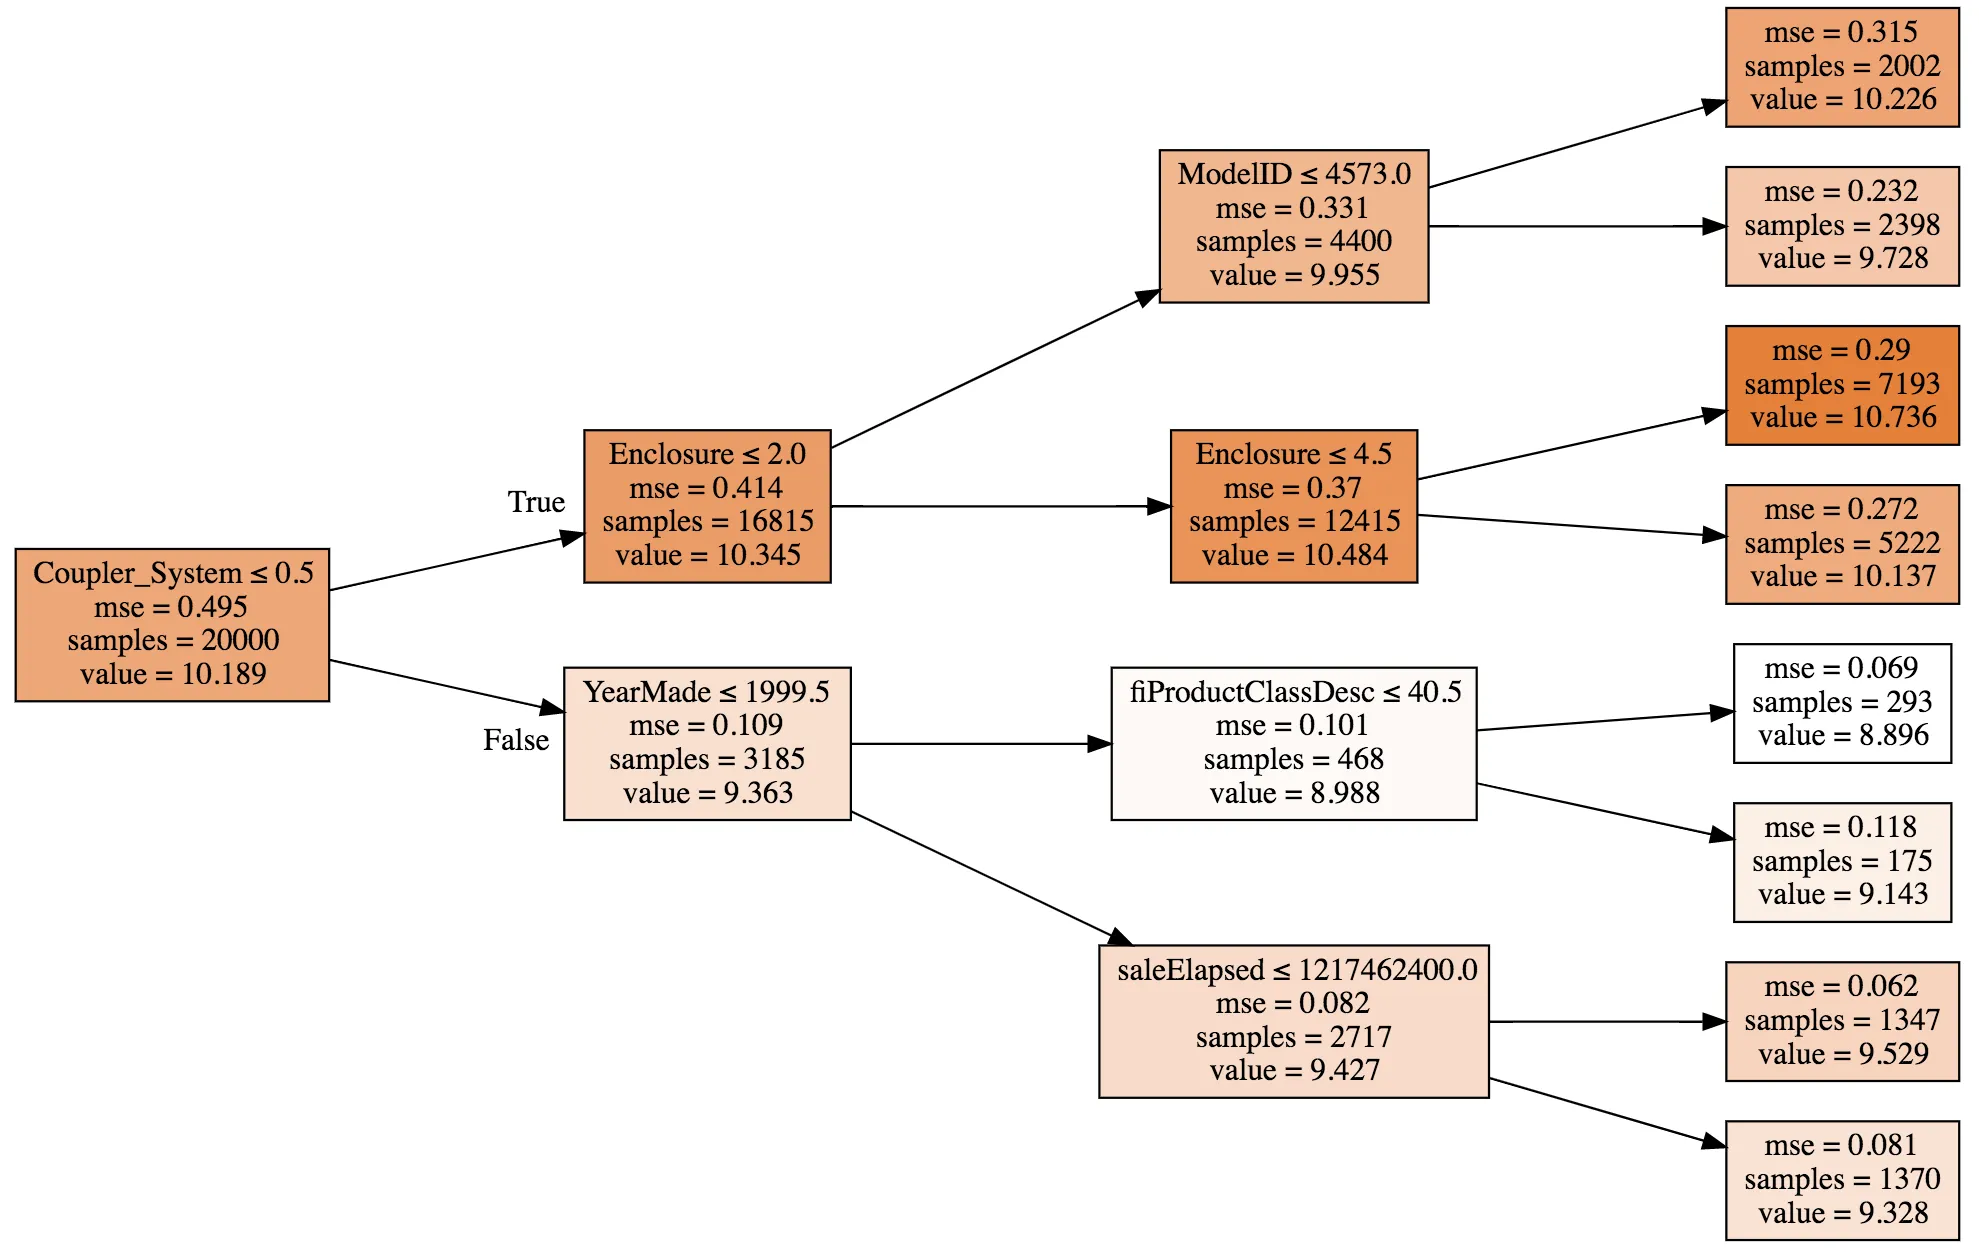


- color indicates error dark - high or light - low
- samples are row
- value is log(mean(target column)) i.e SalePrice
- Best Split is coupler System
    - how?
        - Take difference of Box MSE Coupler and Box YearMade less than 1999.5 MSE


- Build Random Forest From Scratch How?
- Goal we need to pick variable and split the value so two nodes contain different group of values as much as possible.
    - For each Variable - Column
    - Take unique value
        - For each unique value
            - Take weighted average of two nodes

- For Categorical Variable we measure
  - Entropy or Gini.
- For Numerical Variable:
    - we assign two means value for example : For everybody with coupler_system greater than 0.5, we will fill in 10.345, for everybody else, we will put 9.363. Then we will calculate RMSE of this model.


- Remove max-depth?
    - R^2 Train becomes 1
        - because tree will grown unless every leaf has only one value
    - R^2 valid need to monitor to see overfit

- Bagging Techniques To Tackle overfit?
    - create 5 different Tree models
    - Every tree predicts differently
    - different data insight
    - not correlated
    - so average give different insights so its kind of ensembling.
    - mean that the five models would have profound different insights into the relationships in the data

- Example Bagging:
    - Lets say we made 100 overfitting trees
    - each tree contains has 1/10 of data
    - each tree has different function
    - each tree has random errors - avg of them is erorr
    - Bootstrap equals True in that
    -  construct multiple models which are better than nothing and where the errors are, as much as possible, not correlated with each other.
    -  rows are with replacement in each tree not exclusice - about 63.2% appear multiple times

- **Model Purpose :**
  - independent and dependent variable relationship
  - finding relationships in training data and generalise data

- ExtraTreeClassifier
    - used for extremely randomise
    - every split every variable? No it does opposite
    - train faster
    - more trees generalise better
```

preds = np.stack([t.predict(X_valid) for t in m.estimators_]) preds[:,0], np.mean(preds[:,0]), y_valid[0]
(array([ 9.21034,  8.9872 ,  8.9872 ,  8.9872 ,  8.9872 ,  9.21034,  8.92266,  9.21034,  9.21034,  8.9872 ]),  
9.0700003890739005,  
9.1049798563183568)
preds.shape
(10, 12000)
```
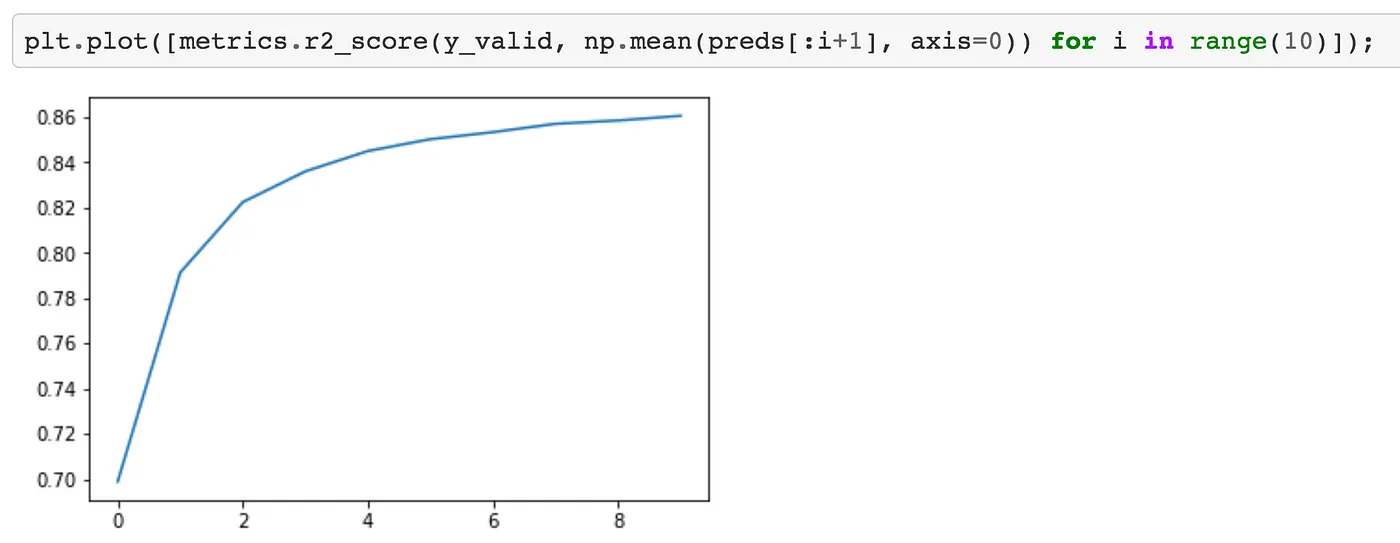

- Try adding more Trees?
    - does not help much 20-30 tree are good 
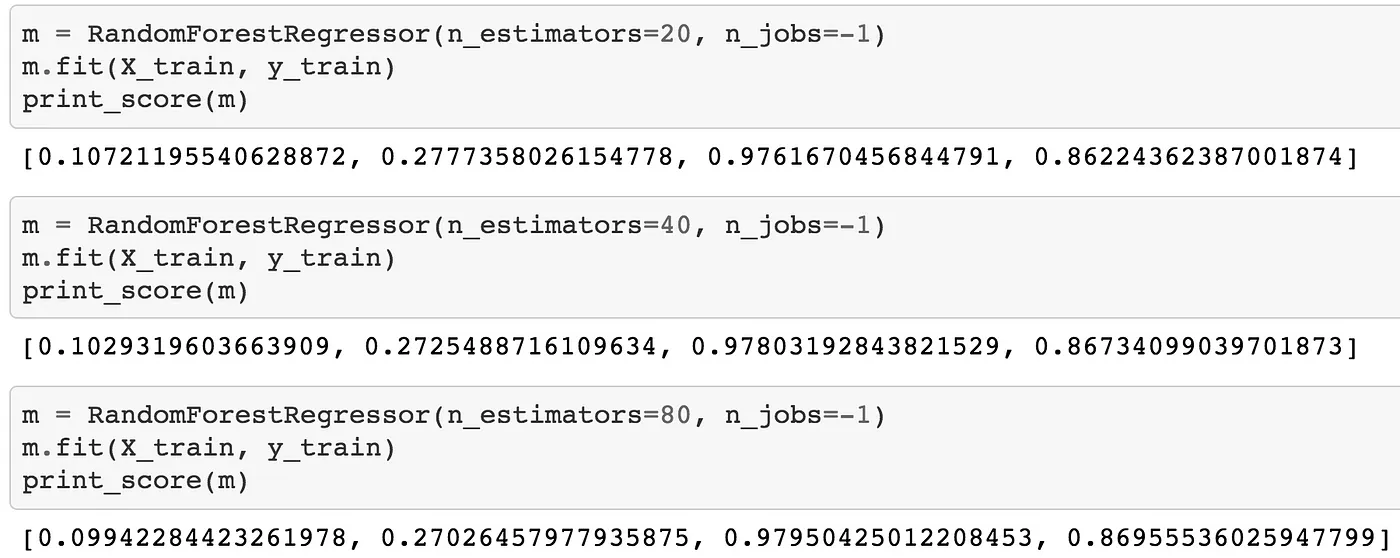


- Vaidation Set Too small used OOB?
    - In random forests, the "OOB" (out-of-bag) refers to the data points that are not included in the bootstrap sample used to train a specific tree within the forest. These OOB samples are then used to estimate the model's performance without needing a separate validation set or cross-validation
    - do not want to pul out validation set
    - tree1 : trainDataTree1  some of rows did not use for training --> validation set
    - tree2 : same do it for second
    - RandomForestRegressor(n_estimators=40, n_jobs=-1,oob_score=True)
  [Link](https://medium.com/data-science/random-forest-explained-a-visual-guide-with-code-examples-9f736a6e1b3c)
    - why accuracy low?
        - Each row appear less in entire random forest
        - less serious underestimation

- Why OOB is useful Great Choice?
    - grid search - every possible set of params - to Set hyper-parameters

- Subsampling
    - pick subset 20,000 entirely different for each tree do not do bootstraping
    - set_rf_samples(20000)
    - OOb compatible with bootstrap only
    - this case we will have different dataset
- Experiment

- 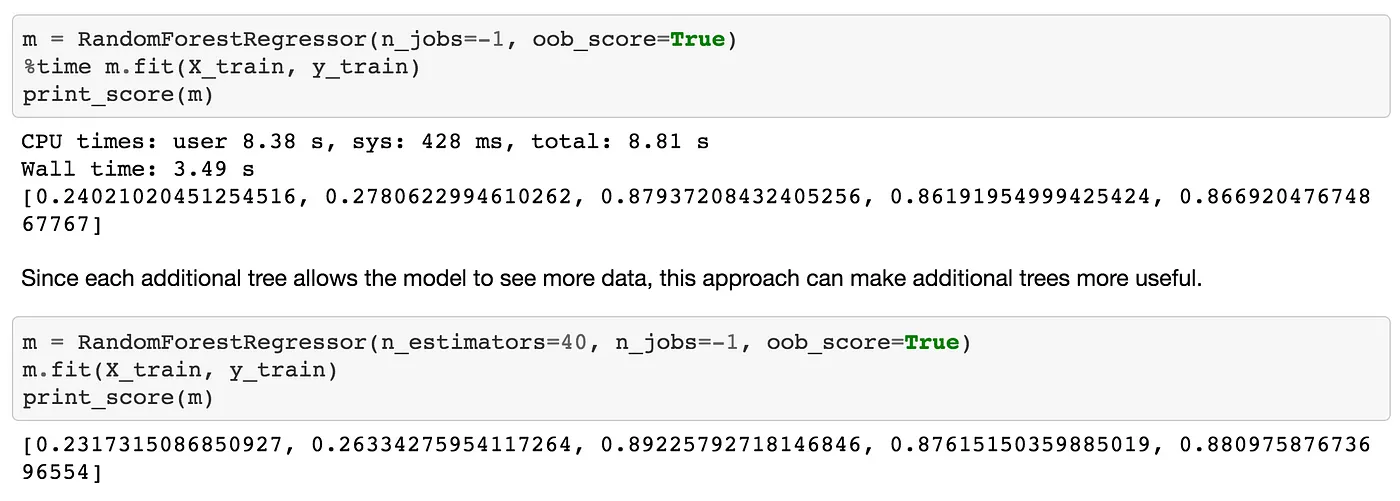


- Results 40 estimators are good

- reset_rf_samples() to turn on OOB usage


- Biggest tip:
    - if you find out with feature are important instead of improving hyperparameter which is just improving decimal points
 
- Now Enable OOB
    - reset_rf_samples()
    - m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
    - OOB is higher because timestamp and validation is different
    - much harder to predict different time


  -  min_samples_leaf=3 :
      - stop training tree if leaf node has 3 or less samples
      - means there will be one or two less levels of decision being made
      - last node will have at leasr 3 samples we will take average of them
      - 1,3,5,10,25  works well
      - Generalise better
      - R^2 improved from .89 to .90

- max_features=0.5
    - consider half of columns for each tree so we will have different starting split points because every tree was beginning with couplersystem
    - Good values to use are 1, 0.5, log2, or sqrt
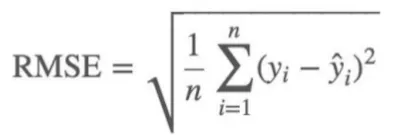
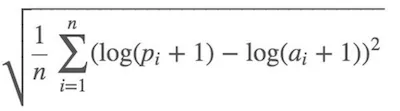
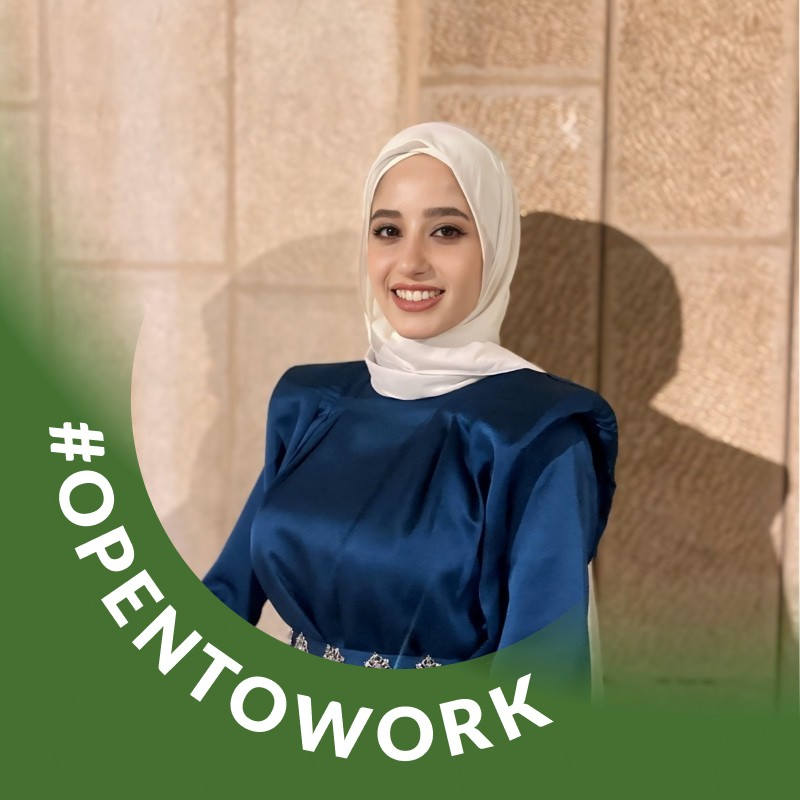
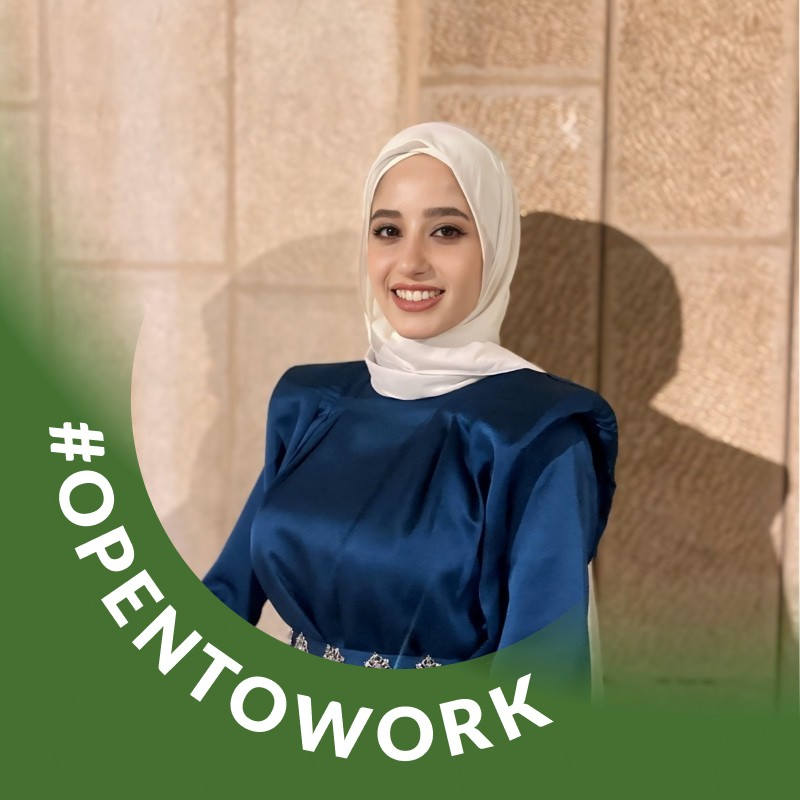
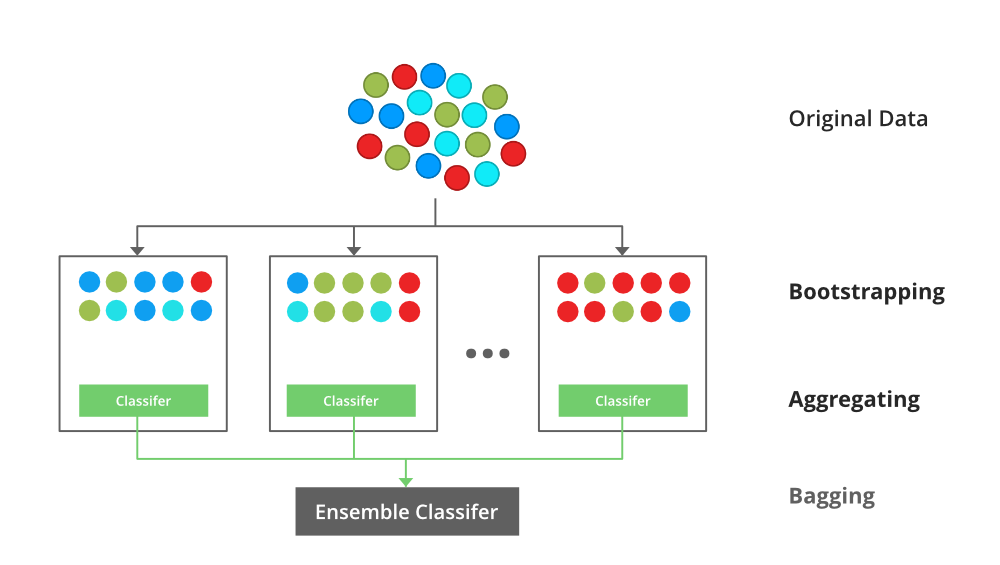
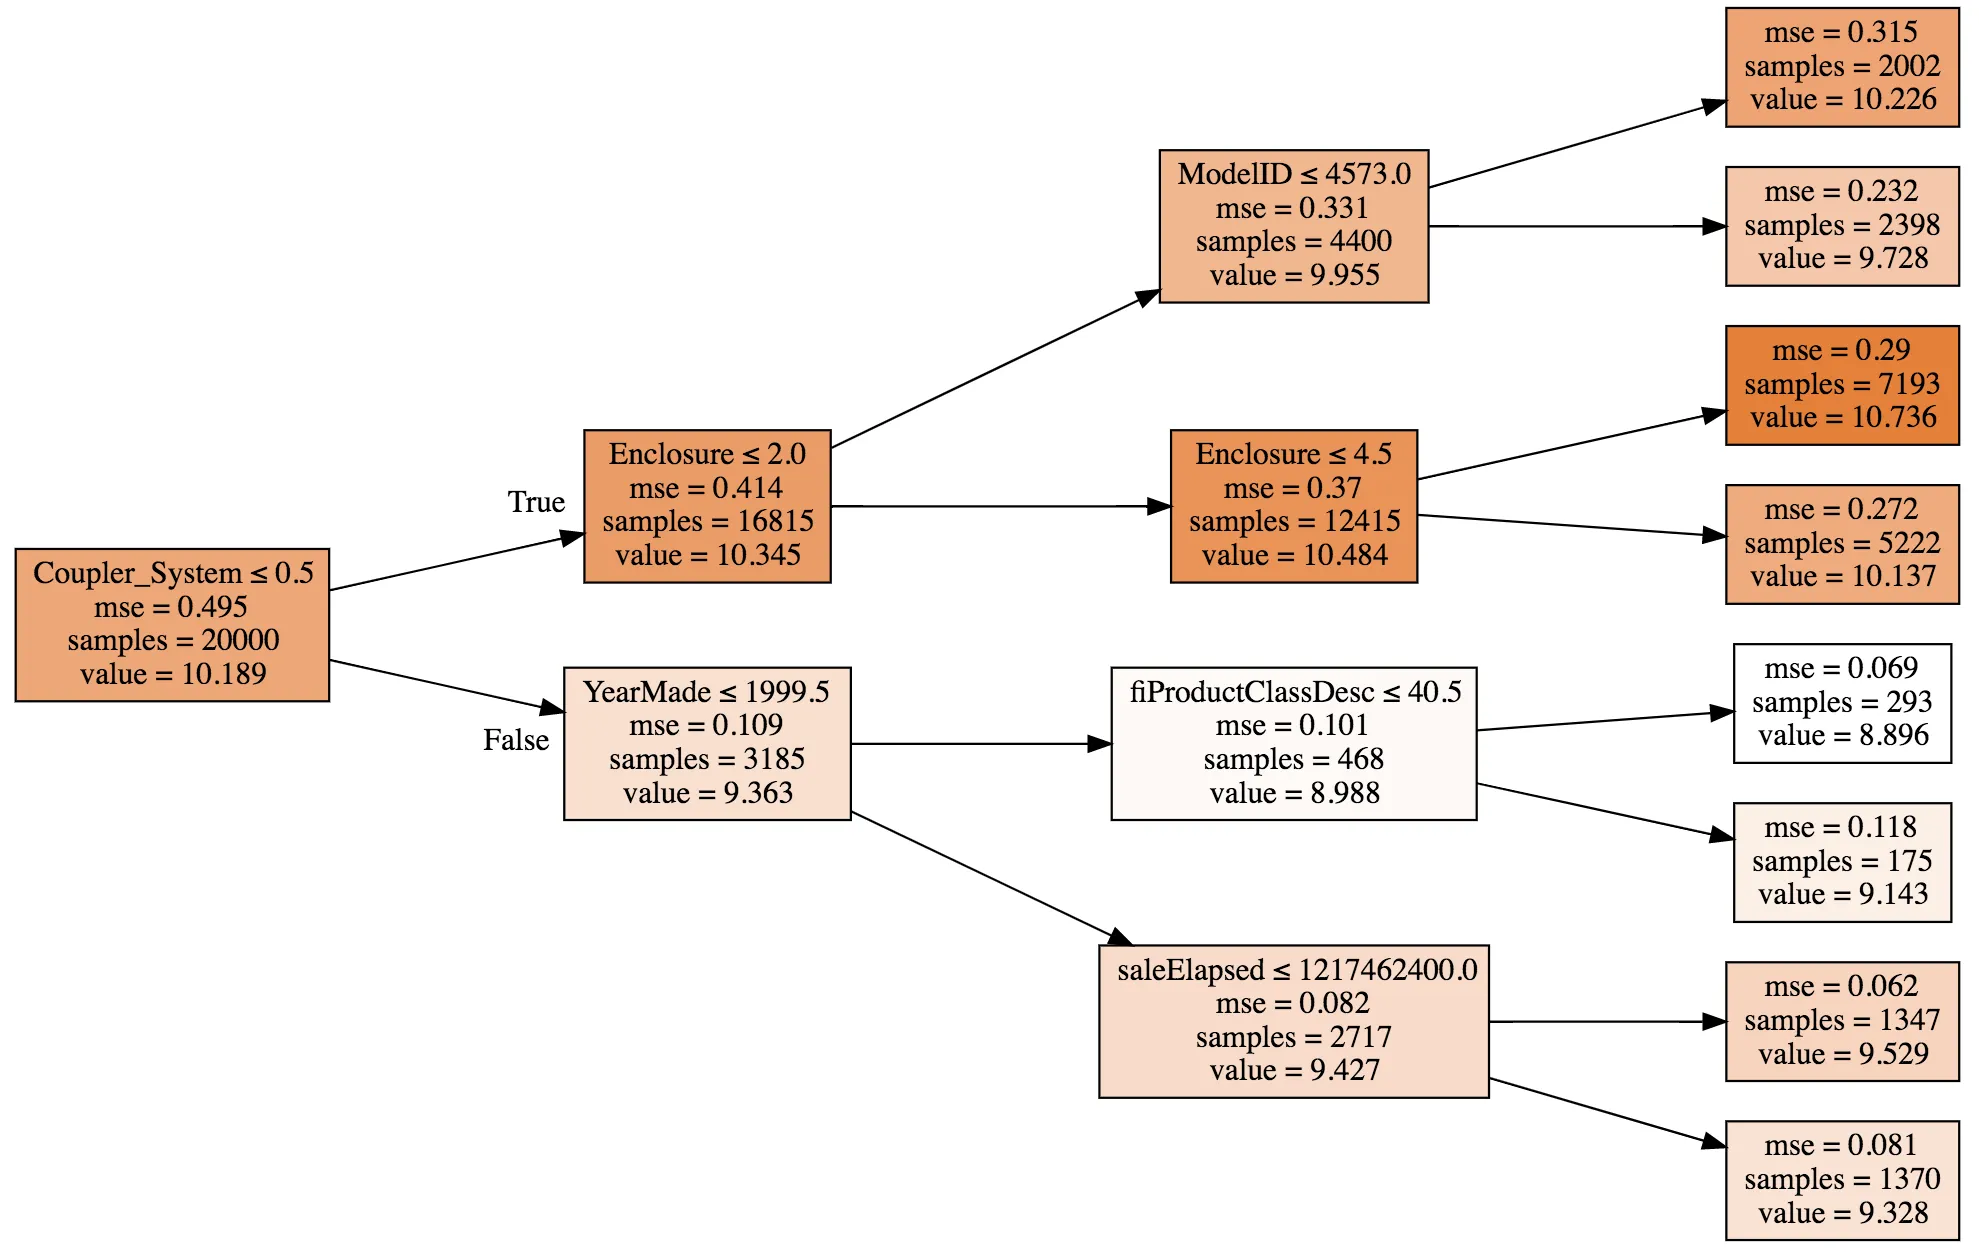
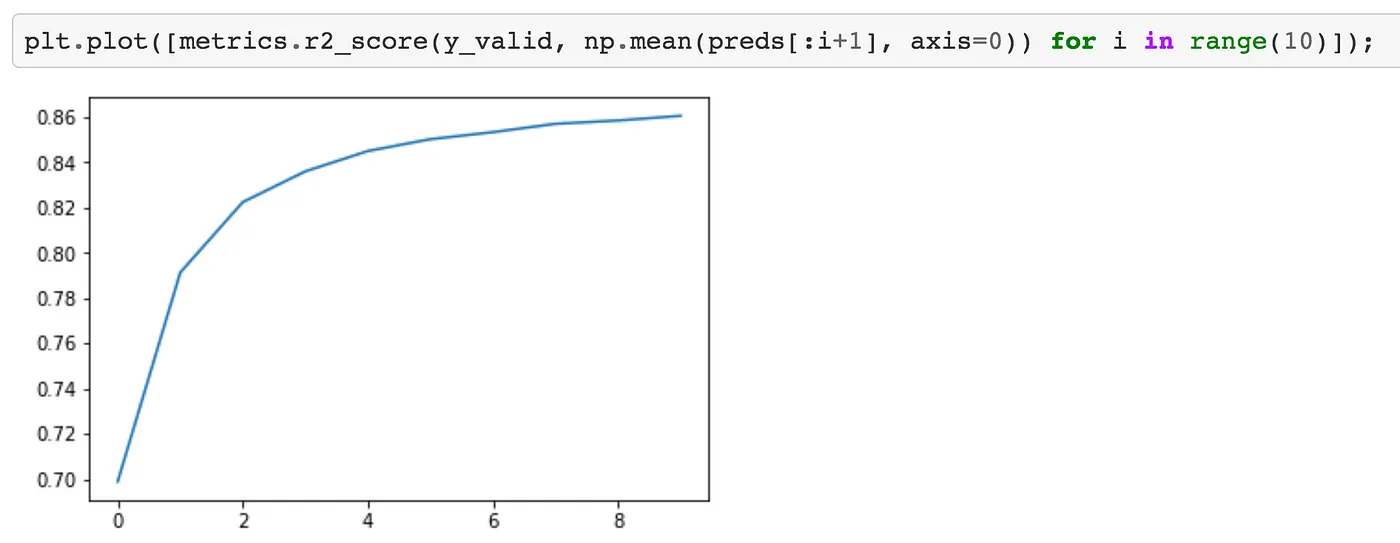
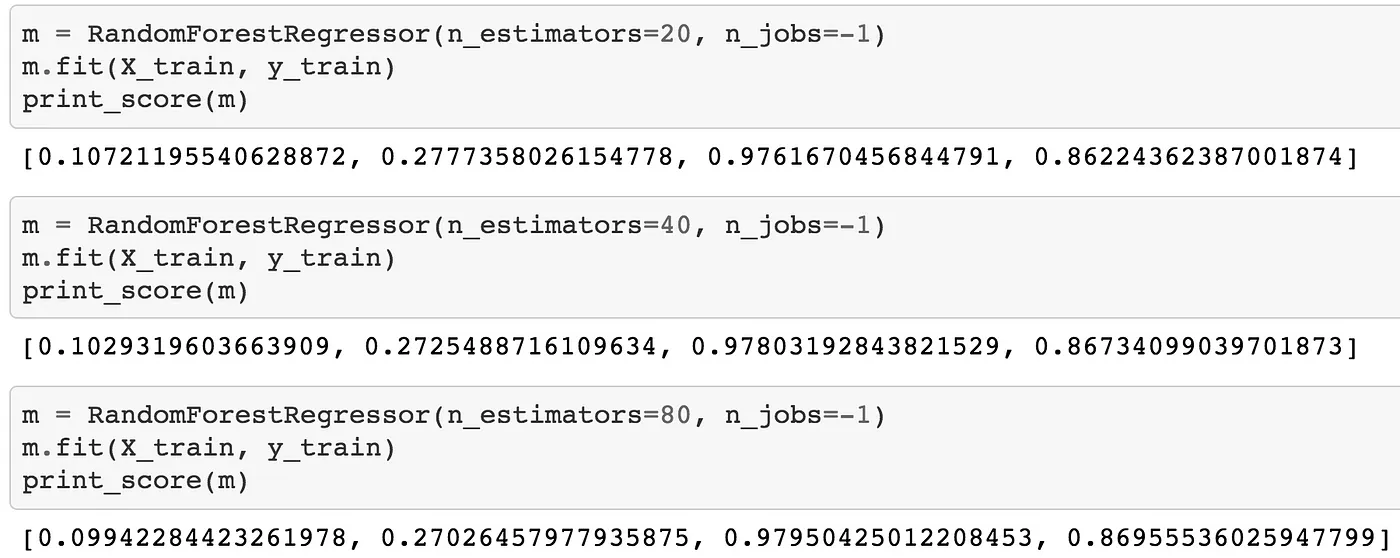
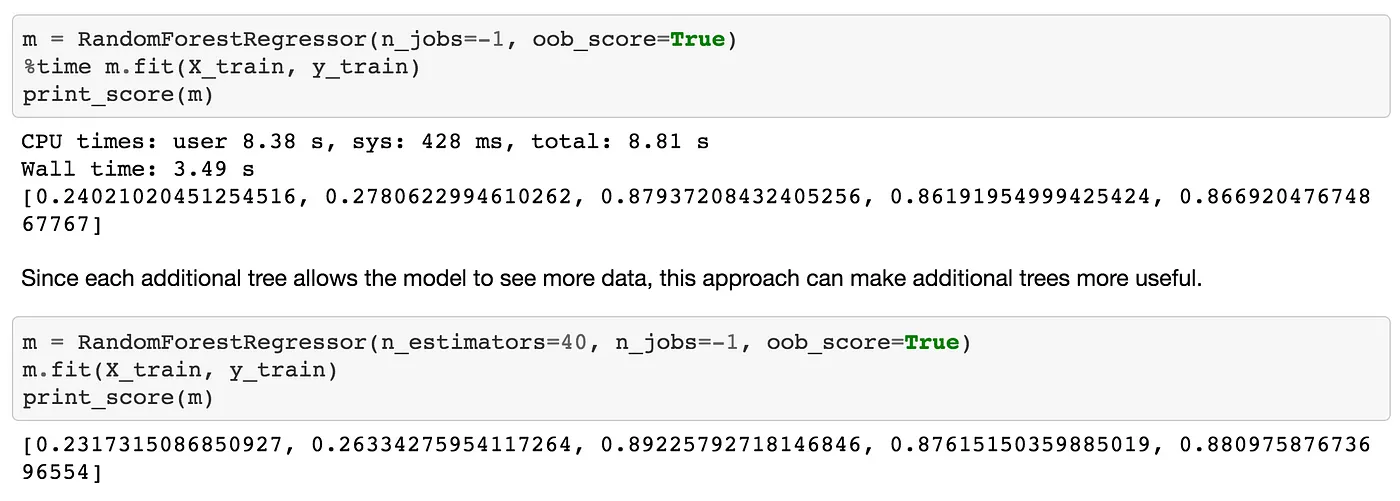

In [ ]:
import numpy as np